# Chapter 5 Confidence intervals

### Example. The simplest confidence interval

$X \sim N(\theta, 1)$. Consider the interval $[X - 1.96, X + 1.96]$. Now simulate $100$ intervals given $\theta = 12$ and plot them.  

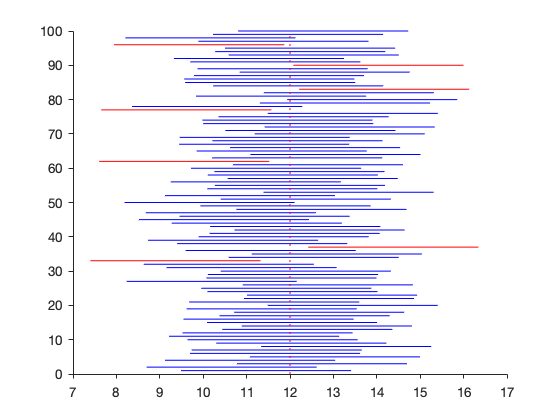

In [43]:
theta = 12;
figure()
hold on
for i = 1:100
    x = normrnd(theta, 1, 1);
    if x - 1.96 <= theta & theta <= x + 1.96
        plot([x-1.96; x+1.96], [i; i], '-b');
    else
        plot([x-1.96; x+1.96], [i; i], '-r');
    end
end
hold off
vline(theta);


### Example 5.4 Intervals based on the Student's t distribution

Le $(X_1, \dots, X_5) \sim N(\mu, \sigma^2)$ iid. Then  $T = {\surd n} (\bar X - \mu)/S_X \sim t_4$. The quantiles $t_{5, 0.025}$ and   $t_{5, 0.975}$ are 

In [44]:
[tinv(0.025, 4), tinv(0.975, 4)] 

ans =
   -2.7764    2.7764


Therefore the interval with extremes
$$
L(X) = \bar X - 2.7764 S_X/\surd 5,\qquad  R(X) = \bar X +2.7764 S_X/\surd 5 
$$
is a CI of level $0.95$. Now we simulate
100 samples and the sequence of confidence intervals of level $0.95$.

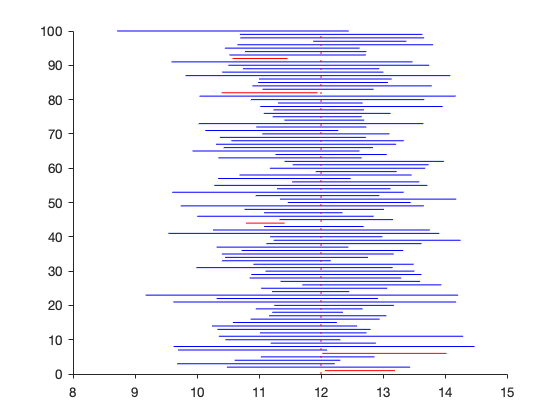

In [45]:
theta = 12; sigma = 1; n = 5;
figure()
hold on
for i = 1:100
    x = normrnd(theta, sigma, n,1);  % sample of size n=5
    xbar = mean(x);
    sx = std(x);
    se = sx/sqrt(n);
    t = tinv(0.975, n-1);
    L = xbar - t * se;
    R = xbar + t * se;
    if L<= theta & theta <= R
        plot([L; R], [i; i], '-b');
    else
        plot([L; R], [i; i], '-r');
    end
end
hold off
vline(theta);

### Example. Glomerular filtration rate
Data from Efron and Hastie and Dr. Myers’ nephrology laboratory: glomerular filtration rates is measured for $211$. `gfr` is an important indicator of kidney function, with low values suggesting trouble.

We want a confidence interval for the mean gfr. 

In [46]:
gfr = [108
91
62
59
84
60
71
105
70
69
66
65
78
83
82
68
107
68
68
69
80
75
89
68
64
68
70
57
62
87
51
55
56
57
75
98
60
68
81
47
76
48
63
58
40
62
61
58
38
40
45
68
56
64
49
53
50
39
54
47
37
50
54
70
49
57
52
47
43
52
57
46
63
56
50
51
50
42
46
56
52
59
45
50
59
44
52
54
53
63
45
56
55
53
56
46
45
49
63
50
41
42
53
50
58
50
37
53
58
49
53
51
64
44
53
53
55
43
50
60
51
55
56
52
51
45
49
51
63
48
51
60
45
40
50
66
62
69
53
54
49
47
63
55
62
57
58
51
50
57
62
45
47
52
35
41
53
48
59
45
41
52
36
84
62
31
41
48
47
50
50
57
53
37
46
41
56
51
39
59
53
51
49
45
42
32
55
34
43
35
48
33
41
38
57
37
40
34
44
43
62
36
41
51
48
31
28
33
35
48
31];

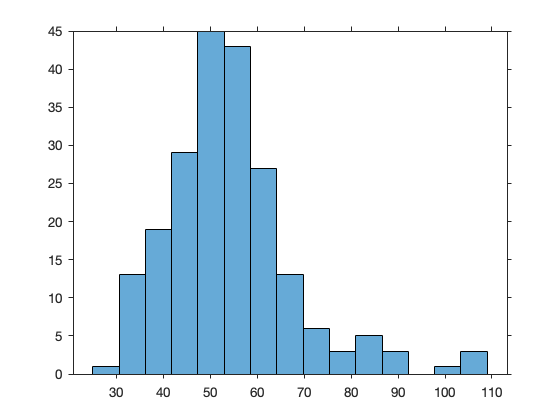

In [47]:
histogram(gfr, 15)

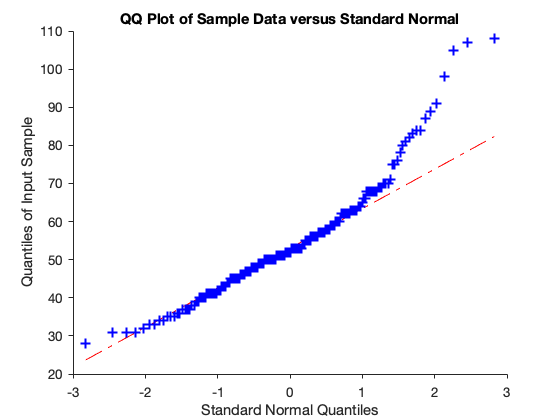

In [48]:
qqplot(gfr)

The QQ-plot indicates that the normality assumption is not valid for the right tail. However the sample size is large. So we use a confidence interval based on the $T$ pivot. 

In [49]:
n = length(gfr)
xbar = mean(gfr)
me = median(gfr)
sx = std(gfr)

n =
   211
xbar =
   54.2654
me =
    52
sx =
   13.7209


In [50]:
alpha = 0.05
[muhat,sx,CI] = normfit(gfr,1-alpha)

alpha =
    0.0500
muhat =
   54.2654
sx =
   13.7209
CI =
   54.2061
   54.3247


In [51]:
t = tinv(1-alpha/2, n-1) 

t =
    1.9713


In [52]:
half = t * sx/sqrt(211)

half =
    1.8621


In [53]:
ci = [xbar - half xbar + half]

ci =
   52.4033   56.1275


### Example 5.2 Near pivot for the Binomial
Solve the equation
$$
(X - n p)^2 \le \xi_{1-\alpha/2}^2(n p (1-p))
$$

In [54]:
x = 13 
n = 20
syms p positive
z = solve((x - n * p)^2 - 1.96^2 *n * p * (1-p) == 0, p)
eval(z)

x =
    13
n =
    20
z =
 6217/9934 - (98*861^(1/2))/14901
 (98*861^(1/2))/14901 + 6217/9934
ans =
    0.4329
    0.8188


The observed confidence interval is $[0.4329, 0.8188]$. Below we show graphically the interval 
such that $|x - n p| \le \xi_{1-\alpha/2} \sqrt{n p (1-p)}$.

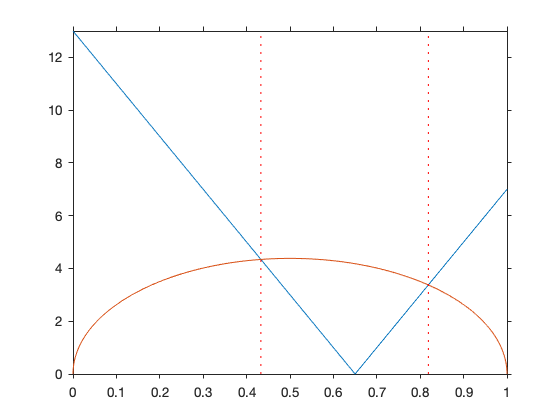

In [55]:
fplot(@(p) abs(x - n * p), [0,1]); hold on
fplot(@(p) 1.96 .* sqrt(n .* p .* (1-p)), [0,1]); hold off
vline(0.4329); vline(0.8188)

### Binomial log-likelihood and observed information

The model is $X\sim Bin(n, \theta)$. The observed information in the maximum likelihood point $\hat \theta = x/n$ is 
$$
\widehat{i}_{\hat\theta} = \frac{n}{\hat \theta(1-\hat \theta)}.
$$
The quadratic approximation to the normalized likelihood is
$$
Q(\theta) = -\frac{1}{2} \Big(\frac{n}{\hat \theta(1-\hat \theta)}\Big)(\theta - \hat \theta)^2
$$

n =
   100
x =
    20


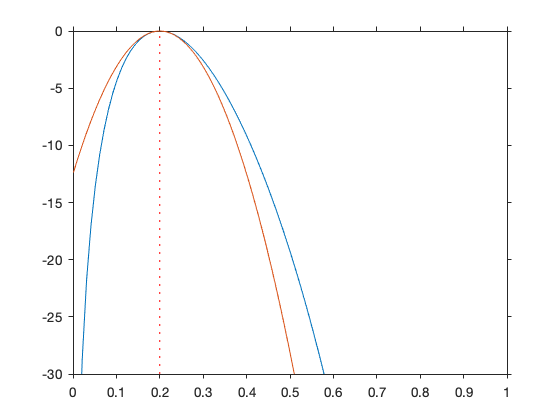

In [64]:
n = 100
x = 20
th = linspace(0.001, 0.999, 100);
llik = @(th) x .* log(th) + (n-x) .* log(1-th) - x .* log(x./n) - (n-x) .* log(1-x./n); 
plot(th, llik(th))
axis([0 1 -30 0])
hold on 
quad = @(th) (-1/2) .* (n ./ ( (x./n) .* (1 - x./n))) .* (th - x./n).^2;
plot(th, quad(th))
vline(x/n)
hold off

Compare with larger sample sizes and the same MLE.

### Multidimensional parameters
Fisher information matrix for the parameter $p$ of the multinomial. Here $p = (p_1, p_2, p_3)^T$ with $\sum_{i=1}^3 p_i = 1$. Thus we compute the matrix only for $p_1, p_2$. 

In [57]:
clear
syms p1 p2 p3 positive

i_p = (ones(2) - eye(2)) ./ p3 + diag([1/p1 + 1/p3, 1/p2 + 1/p3])

i_p =
[ 1/p1 + 1/p3,        1/p3]
[        1/p3, 1/p2 + 1/p3]


Inverse of the Fisher information matrix.

In [58]:
p3 = 1 - p1 - p2;
ii_p = simplify(inv(eval(i_p)))

ii_p =
[ -p1*(p1 - 1),       -p1*p2]
[       -p1*p2, -p2*(p2 - 1)]


The inverse can be written as $I_2 - p p^T$.

### Confidence region for $(p_1, p_2)$ 

Data on pneumoconiosis for $43$ miners after $20$ years of work
$$
\begin{array}{cccc}\hline
Severe & Present & Absent & Total \\
3 & 6 & 34 & 43 \\ \hline
\end{array}
$$
Compute the estimates of $p$, the estimated information matrix and the $95\%$ confidence region.

i_ph =
   15.5980    1.2647
    1.2647    8.4314
K =
    0.0015   -0.0002
   -0.0002    0.0028
ph =
    0.0698
    0.1395
k =
    5.9915


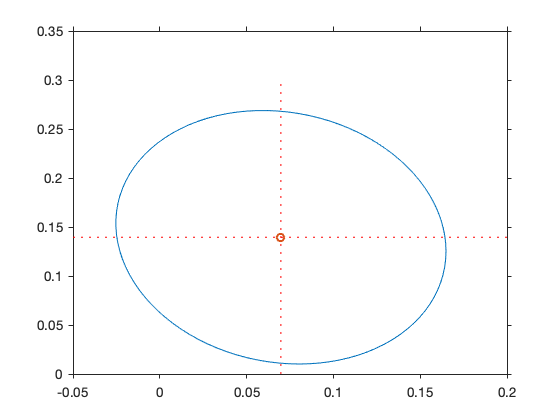

In [59]:
clear;
n = 43;
ph1 = 3/n; 
ph2 = 6/n;
ph3 = 34/n;

i_ph = [1/ph1 + 1/ph3 , 1/ph3
        1/ ph3,  1/ph2 + 1/ph3] % inverse of the asymptotic covariance matrix
K = inv(n * i_ph)               % asymptotic covariance matrix
ph = [ph1; ph2]
k = chi2inv(0.95, 2)
plot_ellipse(ph, K, sqrt(k))
vline(ph1)
hline(ph2)

Note that the region contains  negative probabilities ! 

### Example for the delta method

In [60]:
n = 200; x = 120; 
th = x/n
phi = log(th/(1-th))

th =
    0.6000
phi =
    0.4055


In [61]:
seh = 1/sqrt(n* th *(1-th))

seh =
    0.1443


In [62]:
[phi - 1.96 * seh , phi + 1.96 * seh]

ans =
    0.1226    0.6884


### Plot a dispersion ellipse on a scatter

M =
    26    10
    10    26


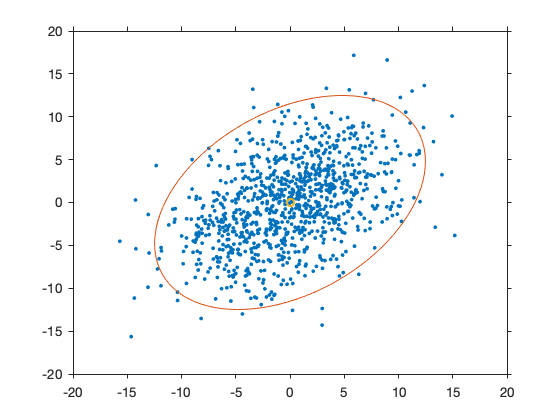

In [63]:
z1 = randn(1000,1);
z2 = randn(1000,1);
A = [5 1;1 5];
X = [z1 z2] * A;
M = A * A'
plot(X(:,1), X(:,2), '.')
hold on 
plot_ellipse([0 0]', M, sqrt(chi2inv(0.95,2)))

### Example 5.23 Confidence interval for the exponential parameter 

Dieci lampadine sono lasciate accese per 40 giorni. $X$ sono le durate delle lampadine. Assumendo che $X$ sia esponenziale con parametro $\lambda$ trovare un intervallo di confidenza al 95% per $\lambda$. 

In [2]:
clear
x = [25    11    12     7     5     4    19     6     6    27]';
n = length(x);

La stima di massima verosimiglianza è $\hat \lambda = 1/\bar x$.

In [3]:
lh = 1/mean(x)

lh =
    0.0820


Definisco la log-verosimiglianza normalizzata.

In [4]:
s = sum(x);
llexp = @(lam) n .* log(lam) - lam .* s  -  n .* log(lh) + lh .* s  

llexp =
  function_handle with value:
    @(lam)n.*log(lam)-lam.*s-n.*log(lh)+lh.*s


Intervallo di confidenza ottenuto tagliando la log-verosimiglianza relativa

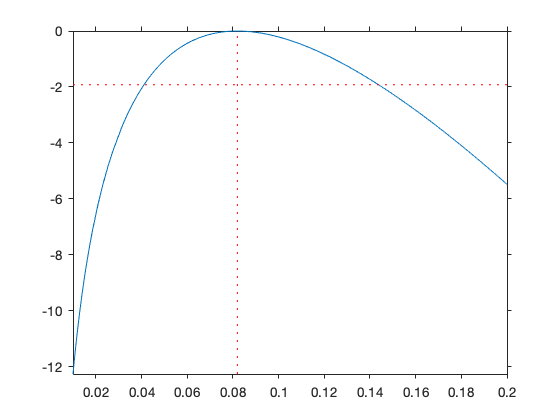

In [36]:
fplot(llexp, [0.01, .2])
vline(lh)
hline(-3.84/2)

In [5]:
syms l  real
fun  = @(l) llexp(l) + 1/2 *3.84
R = fzero(fun, 0.1)
L = fzero(fun, 0.04)

fun =
  function_handle with value:
    @(l)llexp(l)+1/2*3.84
R =
    0.1438
L =
    0.0411


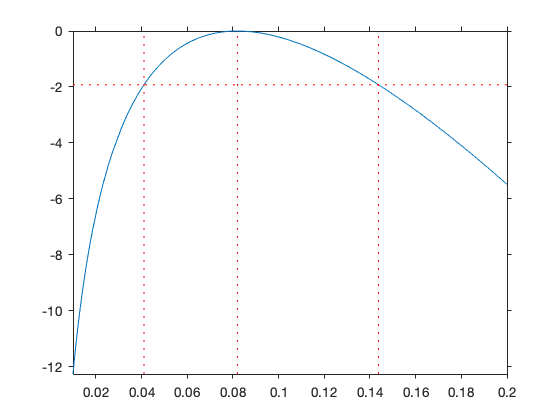

In [6]:
fplot(llexp, [0.01, .2])
vline(lh)
hline(-3.84/2)
vline(L)
vline(R)

### Example (Gelman et al.) 

(Wikipedia) Placenta praevia is when the placenta attaches inside the uterus but near or over the cervical opening.

La placenta previa è considerata una delle emergenze ostetriche del terzo trimestre di gravidanza, soprattutto durante il parto. Anatomicamente la placenta si viene a trovare davanti alla parte di presentazione fetale. Può essere causa di emorragie gravi.

We are interested in estimation of the proportion $\theta$  of female births in the population of the placenta previa births. Is $\theta < 0.485$, the proportion of female births in the general population?

Data: a study in Germany found that of  $n = 980$ placenta previa births, $x = 437$ were female.

Model: $ X \sim Bin(980, \theta)$ and prior $\theta \sim U(0,1) = Beta(1,1)$.

Likelihood: $\theta^{437}(1 - \theta)^{980-437}$

Posterior: $Beta(438, 544)$

Posterior mean: $438/982 = 0.4460285$




In [16]:
post = @(x) betapdf(x, 438, 544);

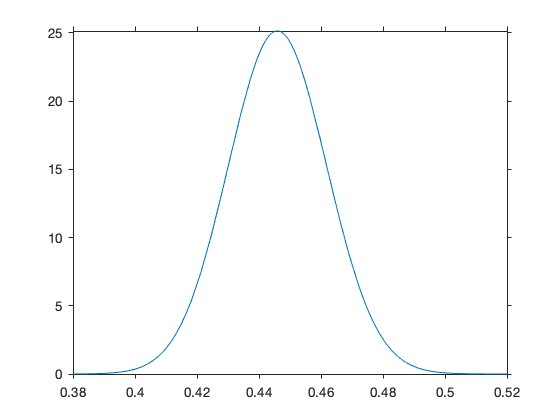

In [17]:
fplot(post, [0.38,0.52])

Note that we can also simulate the posterior

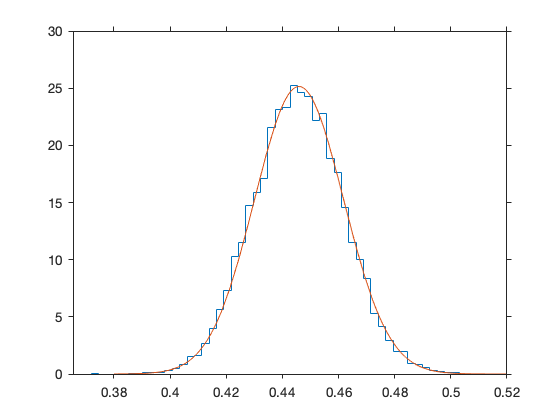

In [18]:
theta = betarnd(438, 544, 10000,1);
histogram(theta, 50, 'Normalization', 'pdf', 'DisplayStyle', 'stairs')
hold on 
fplot(post, [0.38,0.52])
hold off

Credibile intervals of level $0.5,  0.95$. The second is approximate, obtained via simulation

In [26]:
betainv([.025, .25, .75, .975], 438, 544)

ans =
    0.4151    0.4353    0.4567    0.4772


In [37]:
quantile(theta,[.025, .25, .75, .975] )

ans =
    0.4148    0.4350    0.4563    0.4773


Credible interval 95%: $[0.4151, 0.4772]$

Probability that $\theta < 0.485$ is $0.9928$

In [38]:
betacdf(0.485, 438, 544)

ans =
    0.9928


### Example of a HPD credible interval

$X \sim Bin(10, \theta)$, $\theta\sim Beta(1,1)$. Observed $x =2$.

In [95]:
a = betainv(0.025, 3,9);
b = betainv(0.975, 3,9);
q = [a b]       % Quantile based interval



alpha = 0.05;
fun  = @(u) betainv((1-alpha) + u, 3, 9) - betainv(u, 3,9);
g = fminbnd(fun, 0, alpha);
h = [betainv(g, 3,9)   betainv(1-alpha + g, 3, 9)]
%g = linspace(0, alpha, 100);
%l = quantile(theta, g);
%r = quantile(theta, (1-alpha)+g);
%[u,i] = min(r-l);
%h = [l(i) r(i)]     % HPD interval

q =
    0.0602    0.5178
h =
    0.0405    0.4837


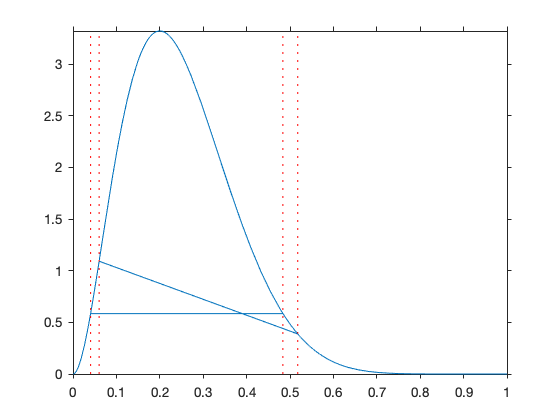

In [98]:
post = @(x) betapdf(x, 3,9);
fplot(post, [0,1])
vline([q(1), q(2)])
line([q(1); q(2)],[betapdf(q(1), 3, 9), betapdf(q(2), 3, 9)])

vline([h(1), h(2)])
line([h(1); h(2)],[betapdf(h(1), 3, 9), betapdf(h(2), 3, 9)])

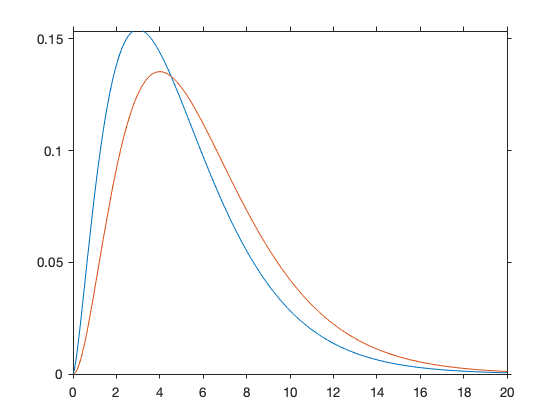

In [9]:
fplot(@(x) chi2pdf(x, 5), [0, 20])
hold on 
fplot(@(x) chi2pdf(x, 6), [0, 20])

In [15]:
diff(chi2inv([0.025 0.925], 25))


ans =
    9.1771


In [16]:
diff(chi2inv([0.025 0.925], 26))

ans =
   23.1402


In [2]:
mu= 0.5; sd = 2; x = normrnd(mu, sd, 1, 50 )

x =
  Columns 1 through 7
    1.1375   -2.1154   -0.3672    1.1852    7.6568    6.0389   -2.1998
  Columns 8 through 14
    6.5698    1.9508    0.3739    1.9295    0.0901    0.2517    3.4794
  Columns 15 through 21
    3.3181    3.3344    1.8430   -1.9150    1.9345    3.7605    1.4778
  Columns 22 through 28
    2.5694    1.9538   -0.1069    1.0877   -1.0746    2.2768   -1.7941
  Columns 29 through 35
   -1.6377   -1.1190   -5.3886    3.3768    1.1504   -1.0099    3.2406
  Columns 36 through 42
   -2.9230    0.2955    0.0171    1.1384    1.1257   -1.2298    0.4399
  Columns 43 through 49
    0.1702    1.7554    2.6865    2.7185   -1.2273    0.6547   -1.9282
  Column 50
   -1.7270


In [4]:
[h,pval,CI,stats] = ttest(x) 

h =
     1
pval =
    0.0122
CI =
    0.2057    1.6033
stats = 
  struct with fields:

    tstat: 2.6012
       df: 49
       sd: 2.4588


In [3]:
help ttest


 TTEST  One-sample and paired-sample t-test.
    H = TTEST(X) performs a t-test of the hypothesis that the data in the
    vector X come from a distribution with mean zero, and returns the
    result of the test in H.  H=0 indicates that the null hypothesis
    ("mean is zero") cannot be rejected at the 5% significance level.  H=1
    indicates that the null hypothesis can be rejected at the 5% level.
    The data are assumed to come from a normal distribution with unknown
    variance.
 
    X can also be a matrix or an N-D array.   For matrices, TTEST performs
    separate t-tests along each column of X, and returns a vector of
    results.  For N-D arrays, TTEST works along the first non-singleton
    dimension of X.
 
    TTEST treats NaNs as missing values, and ignores them.
 
    H = TTEST(X,M) performs a t-test of the hypothesis that the data in
    X come from a distribution with mean M.  M must be a scalar.
 
    H = TTEST(X,Y) performs a paired t-test of the hypothesis that t